Ikeja Electric Data

In [1]:
# Load Outages Data
import pandas as pd
ikeja_data = pd.read_csv('IKEDC.csv')
ikeja_data['Date'] = pd.to_datetime(ikeja_data['Date'], format='%d/%m/%Y')
ikeja_data['Location'] = ikeja_data['Location'].str.upper()
ikeja_data['Location'] = ikeja_data['Location'].str.replace(' ', '')
ikeja_data['Fault'] = ikeja_data['Fault'].str.upper()
ikeja_data['Areas Affected'] = ikeja_data['Areas Affected'].str.upper()
ikeja_data['Areas Affected'] = ikeja_data['Areas Affected'].str.replace('-', ' ')

In [2]:
# Define the date range
start_date = min(ikeja_data['Date'])
end_date = max(ikeja_data['Date'])
date_range = pd.date_range(start_date, end_date)

# Create a DataFrame with the date range
all_dates_df = pd.DataFrame({'Date': date_range})

# Merge the existing DataFrame with the date range DataFrame
merged_df = pd.merge(all_dates_df, ikeja_data, on='Date', how='left')

# Fill missing 'Fault' values with "None"
merged_df['Fault'].fillna('None', inplace=True)

In [39]:
df

,Date,Branch,Location,Feeder,Category,Fault,Areas Affected
0,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI
1,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI
2,2021-10-03,NaN,NaN,NaN,NaN,None,NaN
3,2021-10-04,Abule Egba,FAGBA,Not Specified,Transformer (N/S),FAULT ON 11-IJAIYE OJOKOROINJ-T1-AGBADO 2-MAJE...,11 IJAIYE OJOKOROINJ T1 AGBADO 2 MAJEOBAJE
4,2021-10-05,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...
1046,2023-11-30,NaN,NaN,NaN,NaN,None,NaN
1047,2023-12-01,NaN,NaN,NaN,NaN,None,NaN
1048,2023-12-02,Oshodi,IGANDO,33 KV,Feeder,OUTAGE ON IGANDO 33KV FEEDER,"11 IGANDOINJ T2 GENERAL HOSPITAL ODUNBAYO, 11 ..."
1049,2023-12-02,Akowonjo,ABULE,Not Specified,Substation,CNN TO ALL CUSTOMERS FEEDING FROM ALIMOSHO 3X1...,11 ALIMOSHOINJ T4 AKOWONJO 11 ALIMOSHOINJ T4 F...


/var/folders/dp/fn2v5z3x7pj63xx0j5wvqjvm0000gp/T/ipykernel_3796/2518250321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faults_df['Fault Occurred'] = 1


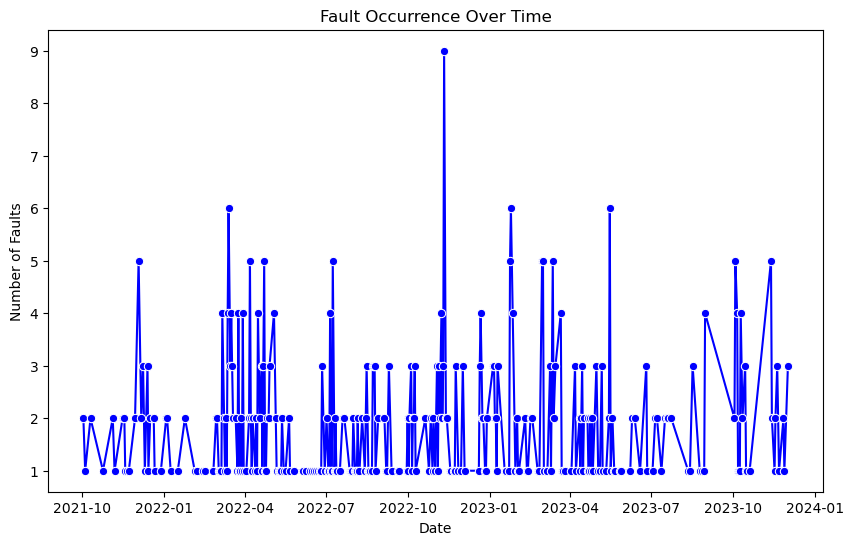

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(merged_df)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Fault' is not None
faults_df = df[df['Fault'] != 'None']

# Create a binary column indicating whether a fault occurred or not on each day
faults_df['Fault Occurred'] = 1

# Group by date and count the occurrences of faults
daily_faults = faults_df.groupby('Date')['Fault Occurred'].sum()

# Plotting the time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_faults, marker='o', color='b')
plt.title('Fault Occurrence Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Faults')
plt.show()

In [18]:
df['Date'].max()

Timestamp('2023-12-02 00:00:00')

In [22]:
df['Category'].value_counts()

Category
Transformer                           179
Feeder                                167
Customer Notification                  86
Planned                                51
High-Voltage (Distribution) System     18
Transmission                           16
Breaker                                15
Human                                  14
Substation                             12
Name: count, dtype: int64

In [8]:
df.replace({'Transformer (N/S)': 'Transformer'}, inplace=True)
df.replace({'HVDS': 'High-Voltage (Distribution) System'}, inplace=True)
df.replace({'TCN': 'Transmission'}, inplace=True)
df.replace({'Notification': 'Customer Notification'}, inplace=True)
df.replace({'DT': 'Transformer'}, inplace=True)

In [27]:
df['Branch'].value_counts()

Branch
Abule Egba    156
Akowonjo      114
Ikeja         110
Shomolu       107
Oshodi         46
Ikorodu        25
Name: count, dtype: int64

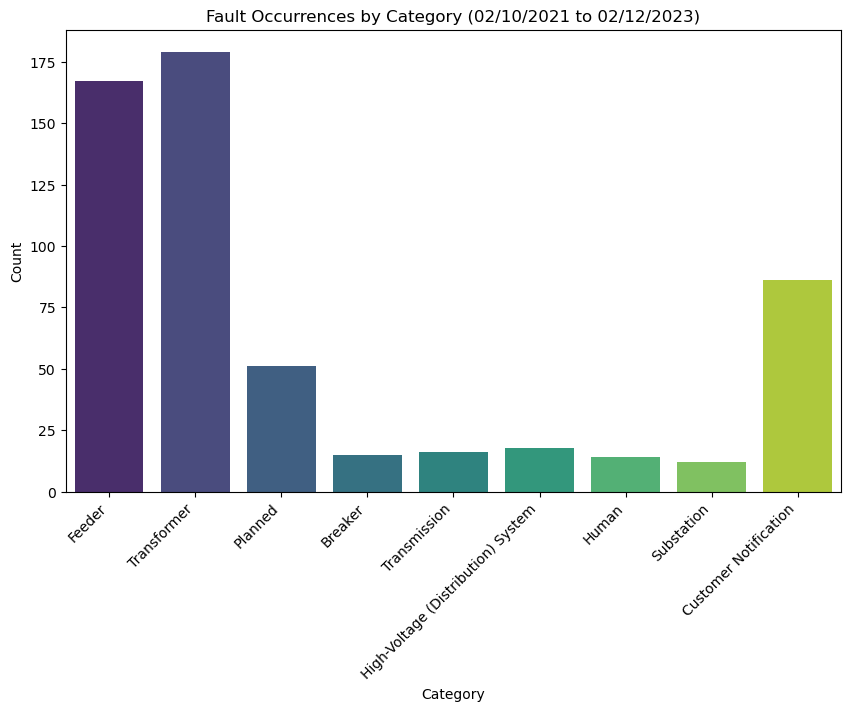

Descriptive Statistics:
                                 Date      Branch Location         Feeder  \
count                            1051         558      558            556   
unique                            NaN           6       55              4   
top                               NaN  Abule Egba      IJU  Not Specified   
freq                              NaN         156       46            396   
mean    2022-10-31 21:25:10.561370112         NaN      NaN            NaN   
min               2021-10-02 00:00:00         NaN      NaN            NaN   
25%               2022-04-19 12:00:00         NaN      NaN            NaN   
50%               2022-11-06 00:00:00         NaN      NaN            NaN   
75%               2023-05-02 12:00:00         NaN      NaN            NaN   
max               2023-12-02 00:00:00         NaN      NaN            NaN   

           Category Fault Areas Affected  
count           558  1051            553  
unique            9   422            423  

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Fault' column to categorical
df['Fault'] = pd.Categorical(df['Fault'])

# Descriptive statistics for the numerical columns
desc_stats = df.describe(include='all')

# Count of faults by category
faults_by_category = df.groupby('Category')['Fault'].count()

# Top 5 most common faults
top_faults = df['Category'].value_counts().head(5)

# Plotting the distribution of fault occurrences by category
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Fault Occurrences by Category (02/10/2021 to 02/12/2023)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the results
print("Descriptive Statistics:")
print(desc_stats)

print("\nFaults Count by Category:")
print(faults_by_category)

print("\nTop 5 Most Common Faults:")
print(top_faults)

Descriptive Statistics:

- Date:
  - Count: 1051
  - Unique Dates: 363
  - Most Frequent Date: 2021-10-02
  - Frequency: 2 occurrences

- Branch:
  - Count: 558
  - Unique Branches: 6
  - Most Frequent Branch: Abule Egba
  - Frequency: 156 occurrences

- Location:
  - Count: 558
  - Unique Locations: 55
  - Most Frequent Location: IJU
  - Frequency: 46 occurrences

- Feeder (Excluding "Not Specified"):
  - Count: 160
  - Unique Feeders: 3
  - Most Frequent Feeder: 33KV
  - Frequency: 83 occurrences

- Category:
  - Count: 558
  - Unique Categories: 11
  - Most Frequent Category: Feeder
  - Frequency: 167 occurrences

- Fault:
  - Count: 1051
  - Unique Faults: 425
  - Most Frequent Fault: FEEDER FAULT
  - Frequency: 493 occurrences

- Areas Affected:
  - Count: 553
  - Unique Areas Affected: 423
  - Most Frequent Area: IJU
  - Frequency: 8 occurrences
  
Faults Count by Category:
- Breaker               15
- DT                    65
- Feeder               167
- HVDS                  18
- Human                 14
- Notification          86
- Planned               51
- Substation            12
- TCN                   16
- Transformer           57
- Transformer (N/S)     57


Top 5 Most Common Faults:
- Feeder               167
- Notification          86
- DT                    65
- Transformer (N/S)     57
- Transformer           57

In [48]:
df_feeder_exclude.describe(include='all')

,Date,Branch,Location,Feeder,Category,Fault,Areas Affected
count,655,162,162,160,162,655,159
unique,NaN,6,40,3,10,145,127
top,NaN,Abule Egba,IJU,33 KV,Feeder,None,LAMBE
freq,NaN,41,9,83,106,493,5
mean,2022-10-28 21:28:18.320610816,NaN,NaN,NaN,NaN,NaN,NaN
min,2021-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-03-22 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-11-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2023-05-29 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,2023-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/dp/fn2v5z3x7pj63xx0j5wvqjvm0000gp/T/ipykernel_72886/2600894479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feeder_exclude['Fault'] = pd.Categorical(df_feeder_exclude['Fault'])


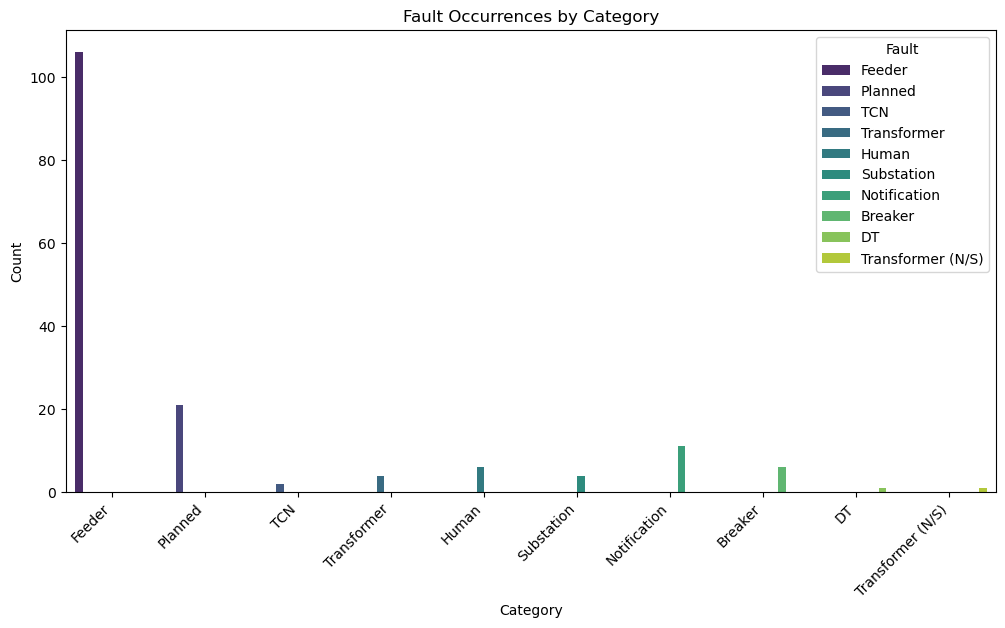

Descriptive Statistics (Excluding 'Not Specified' in Feeder):
                                 Date      Branch Location Feeder Category  \
count                             655         162      162    160      162   
unique                            NaN           6       40      3       10   
top                               NaN  Abule Egba      IJU  33 KV   Feeder   
freq                              NaN          41        9     83      106   
mean    2022-10-28 21:28:18.320610816         NaN      NaN    NaN      NaN   
min               2021-10-02 00:00:00         NaN      NaN    NaN      NaN   
25%               2022-03-22 12:00:00         NaN      NaN    NaN      NaN   
50%               2022-11-05 00:00:00         NaN      NaN    NaN      NaN   
75%               2023-05-29 12:00:00         NaN      NaN    NaN      NaN   
max               2023-12-02 00:00:00         NaN      NaN    NaN      NaN   

       Fault Areas Affected  
count    655            159  
unique   145       

In [46]:
df['Date'] = pd.to_datetime(df['Date'])

# Exclude 'Not Specified' in 'Feeder' descriptive statistics
df_feeder_exclude = df[df['Feeder'] != 'Not Specified']

# Convert 'Fault' column to categorical
df_feeder_exclude['Fault'] = pd.Categorical(df_feeder_exclude['Fault'])

# Descriptive statistics for the numerical columns
desc_stats = df_feeder_exclude.describe(include='all')

# Count of faults by category
faults_by_category = df_feeder_exclude.groupby('Category')['Fault'].count()

# Top 5 most common faults
top_faults = df_feeder_exclude['Category'].value_counts().head(5)

# Plotting the distribution of fault occurrences by category
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df_feeder_exclude, hue='Category', palette='viridis')
plt.title('Fault Occurrences by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fault')
plt.show()

# Display the results
print("Descriptive Statistics (Excluding 'Not Specified' in Feeder):")
print(desc_stats)

print("\nFaults Count by Category (Excluding 'Not Specified' in Feeder):")
print(faults_by_category)

print("\nTop 5 Most Common Faults (Excluding 'Not Specified' in Feeder):")
print(top_faults)

In [34]:
neso_data = pd.read_csv('neso/neso_power_data.csv')

Average peak generation over the period: 4426.73
Maximum peak generation: 5294.10
Minimum peak generation: 3051.50


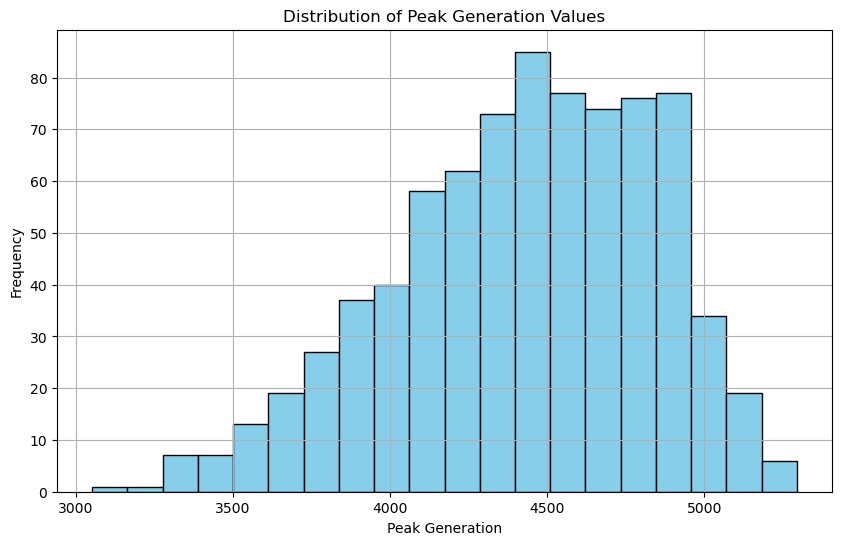

In [42]:
# Average peak generation over the period
average_peak_generation = neso_data['Peak Generation'].mean()
print(f'Average peak generation over the period: {average_peak_generation:.2f}')

# Maximum and minimum peak generation values recorded
max_peak_generation = neso_data['Peak Generation'].max()
min_peak_generation = neso_data['Peak Generation'].min()
print(f'Maximum peak generation: {max_peak_generation:.2f}')
print(f'Minimum peak generation: {min_peak_generation:.2f}')

# Distribution of peak generation values (histogram)
plt.figure(figsize=(10, 6))
plt.hist(neso_data['Peak Generation'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Peak Generation Values')
plt.xlabel('Peak Generation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

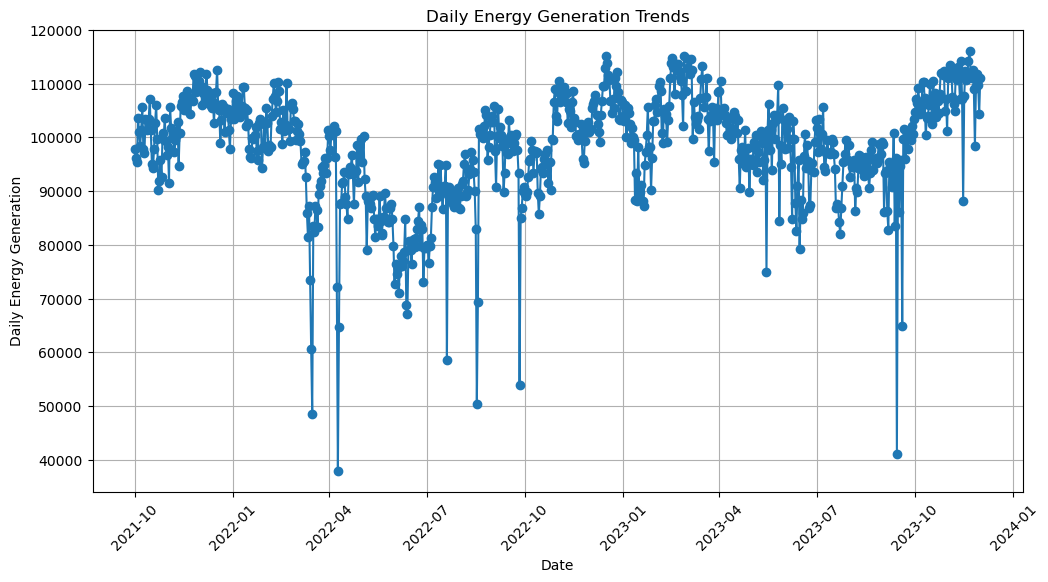

Correlation between peak generation and daily energy generation: 0.85


In [35]:
neso_data['Date'] = pd.to_datetime(neso_data['Date'])

# Trend analysis of daily energy generation over time
plt.figure(figsize=(12, 6))
plt.plot(neso_data['Date'], neso_data['Daily Energy Generation'], marker='o', linestyle='-')
plt.title('Daily Energy Generation Trends')
plt.xlabel('Date')
plt.ylabel('Daily Energy Generation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Correlation between peak generation and daily energy generation
correlation = neso_data['Peak Generation'].corr(neso_data['Daily Energy Generation'])
print(f'Correlation between peak generation and daily energy generation: {correlation:.2f}')

/var/folders/dp/fn2v5z3x7pj63xx0j5wvqjvm0000gp/T/ipykernel_3796/2518250321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faults_df['Fault Occurred'] = 1


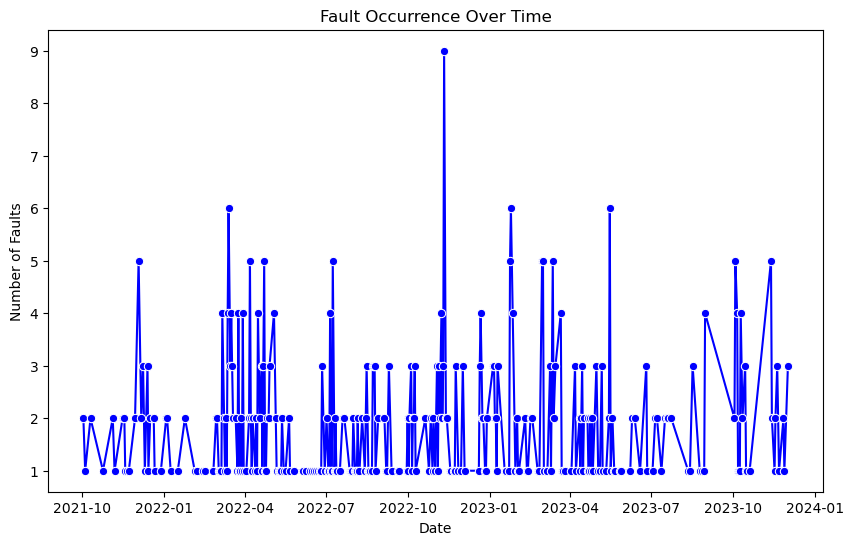

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(merged_df)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Fault' is not None
faults_df = df[df['Fault'] != 'None']

# Create a binary column indicating whether a fault occurred or not on each day
faults_df['Fault Occurred'] = 1

# Group by date and count the occurrences of faults
daily_faults = faults_df.groupby('Date')['Fault Occurred'].sum()

# Plotting the time series
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_faults, marker='o', color='b')
plt.title('Fault Occurrence Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Faults')
plt.show()

/var/folders/dp/fn2v5z3x7pj63xx0j5wvqjvm0000gp/T/ipykernel_3796/1769626710.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faults_df['Fault Occurred'] = 1


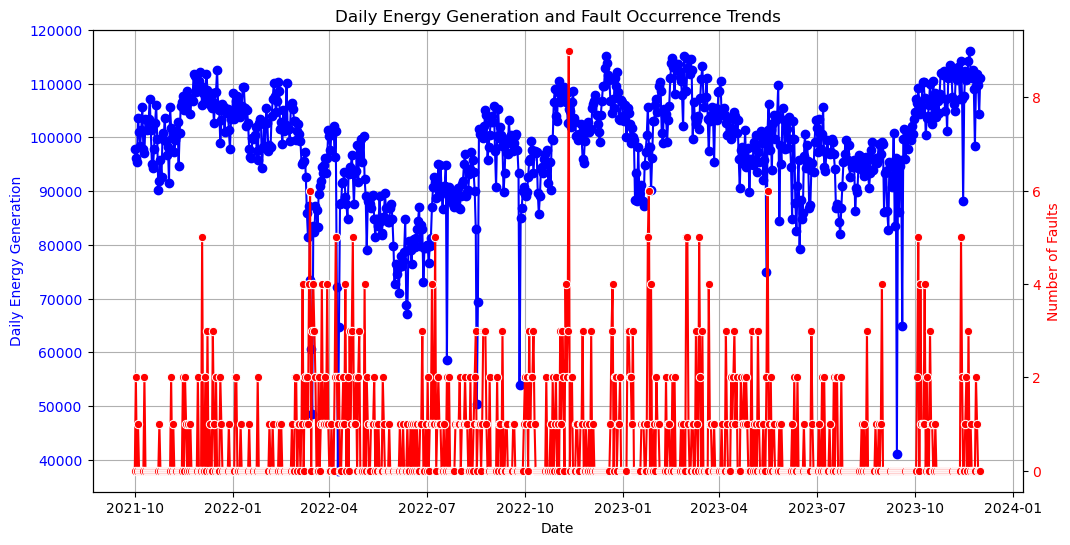

In [36]:

# Convert 'Date' column to datetime in both dataframes
neso_data['Date'] = pd.to_datetime(neso_data['Date'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Filter rows where 'Fault' is not None
faults_df = merged_df[merged_df['Fault'] != 'None']

# Create a binary column indicating whether a fault occurred or not on each day
faults_df['Fault Occurred'] = 1

# Group by date and count the occurrences of faults
daily_faults = faults_df.groupby('Date')['Fault Occurred'].sum()

# Merge daily energy generation data with daily fault occurrences
merged_data = pd.merge(neso_data[['Date', 'Daily Energy Generation']], daily_faults, on='Date', how='left')

# Fill NaN values in 'Fault Occurred' with 0
merged_data['Fault Occurred'] = merged_data['Fault Occurred'].fillna(0)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot daily energy generation
ax1.plot(merged_data['Date'], merged_data['Daily Energy Generation'], marker='o', linestyle='-', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Energy Generation', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create a second y-axis for fault occurrences
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x='Date', y='Fault Occurred', marker='o', color='r', ax=ax2)
ax2.set_ylabel('Number of Faults', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title
plt.title('Daily Energy Generation and Fault Occurrence Trends')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

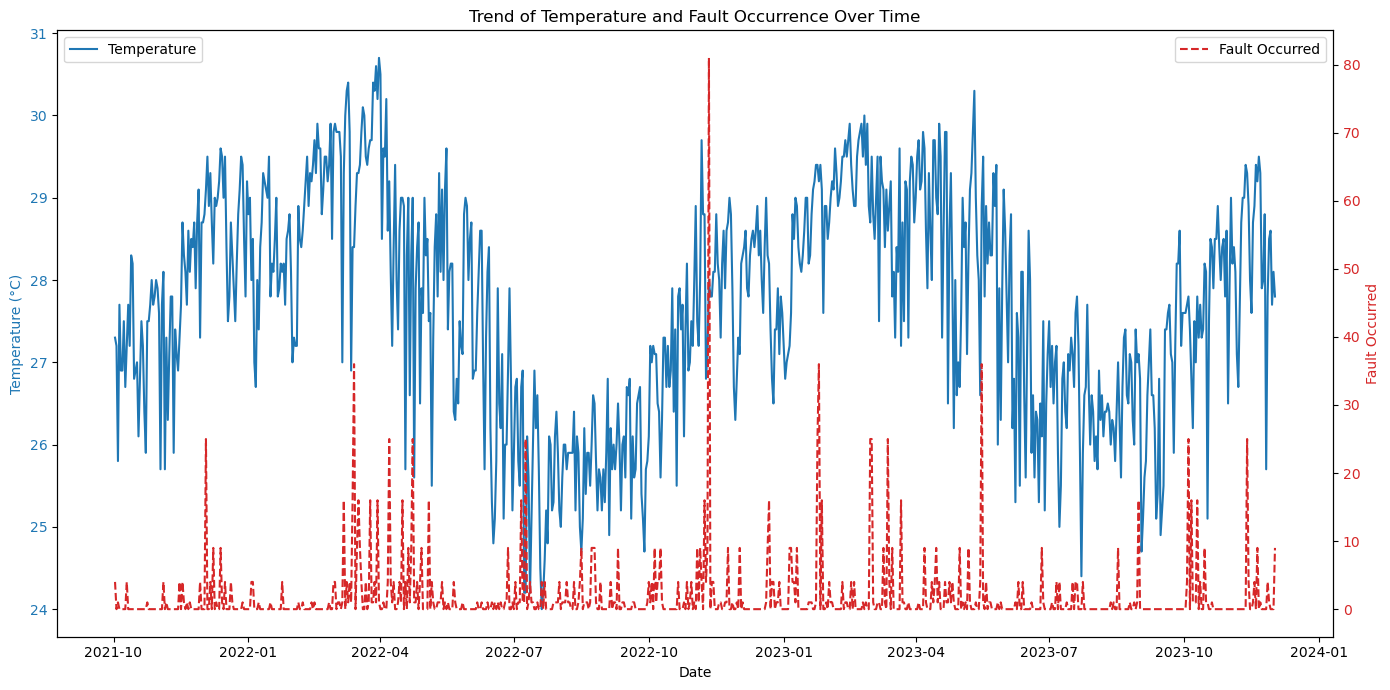

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' column is datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Prepare the data
faults_per_day = merged_df.groupby('Date')['Fault Occurred'].sum().reset_index()
temp_per_day = merged_df.groupby('Date')['temp'].mean().reset_index()

# Merge the dataframes on 'Date'
trend_df = pd.merge(faults_per_day, temp_per_day, on='Date', how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot temperature on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
sns.lineplot(data=trend_df, x='Date', y='temp', ax=ax1, color='tab:blue', label='Temperature', linestyle='-')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot fault occurrence on the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Fault Occurred', color='tab:red')
sns.lineplot(data=trend_df, x='Date', y='Fault Occurred', ax=ax2, color='tab:red', label='Fault Occurred', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title and show plot
plt.title('Trend of Temperature and Fault Occurrence Over Time')
fig.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


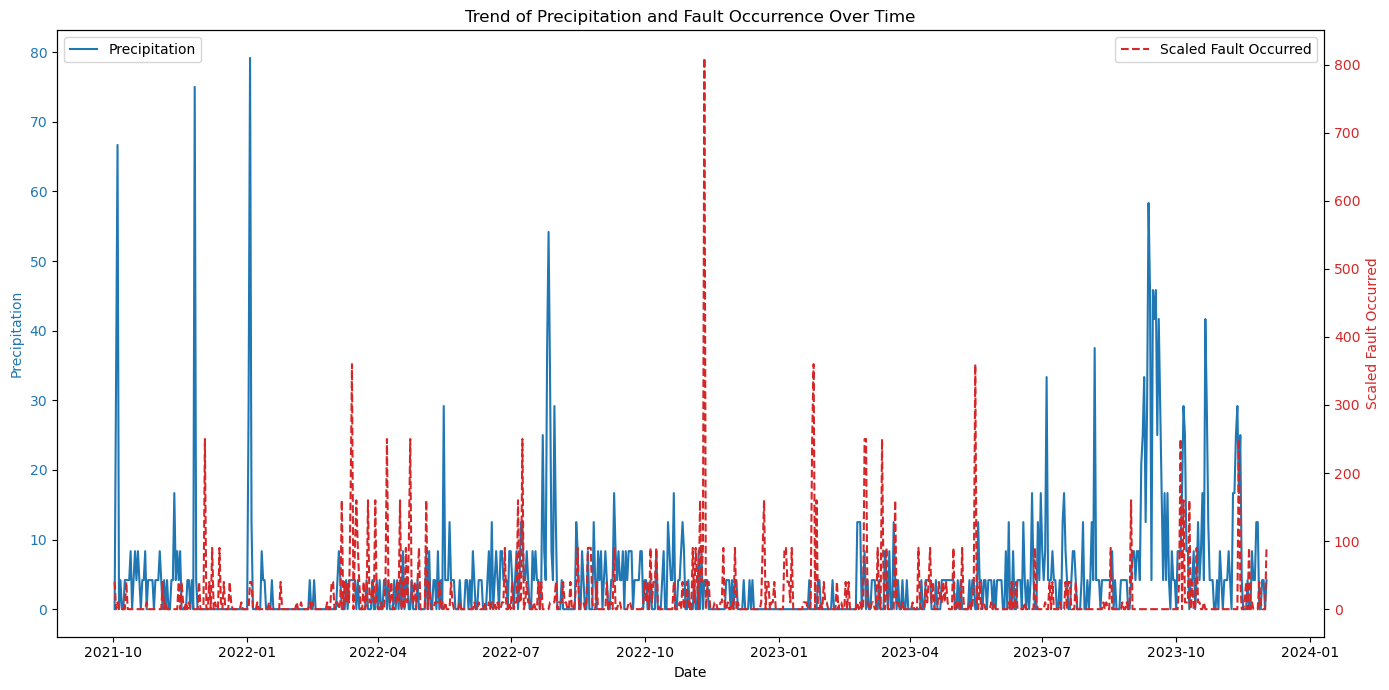

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' column is datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Prepare the data
faults_per_day = merged_df.groupby('Date')['Fault Occurred'].sum().reset_index()
temp_per_day = merged_df.groupby('Date')['precipcover'].mean().reset_index()

# Merge the dataframes on 'Date'
trend_df = pd.merge(faults_per_day, temp_per_day, on='Date', how='inner')

# Scale 'Fault Occurred' to make it more visible on the plot
scale_factor = 10  # Adjust this factor as needed
trend_df['Scaled Fault Occurred'] = trend_df['Fault Occurred'] * scale_factor

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot precipitation on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation', color='tab:blue')
sns.lineplot(data=trend_df, x='Date', y='precipcover', ax=ax1, color='tab:blue', label='Precipitation', linestyle='-')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot scaled fault occurrence on the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Scaled Fault Occurred', color='tab:red')
sns.lineplot(data=trend_df, x='Date', y='Scaled Fault Occurred', ax=ax2, color='tab:red', label='Scaled Fault Occurred', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title and show plot
plt.title('Trend of Precipitation and Fault Occurrence Over Time')
fig.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


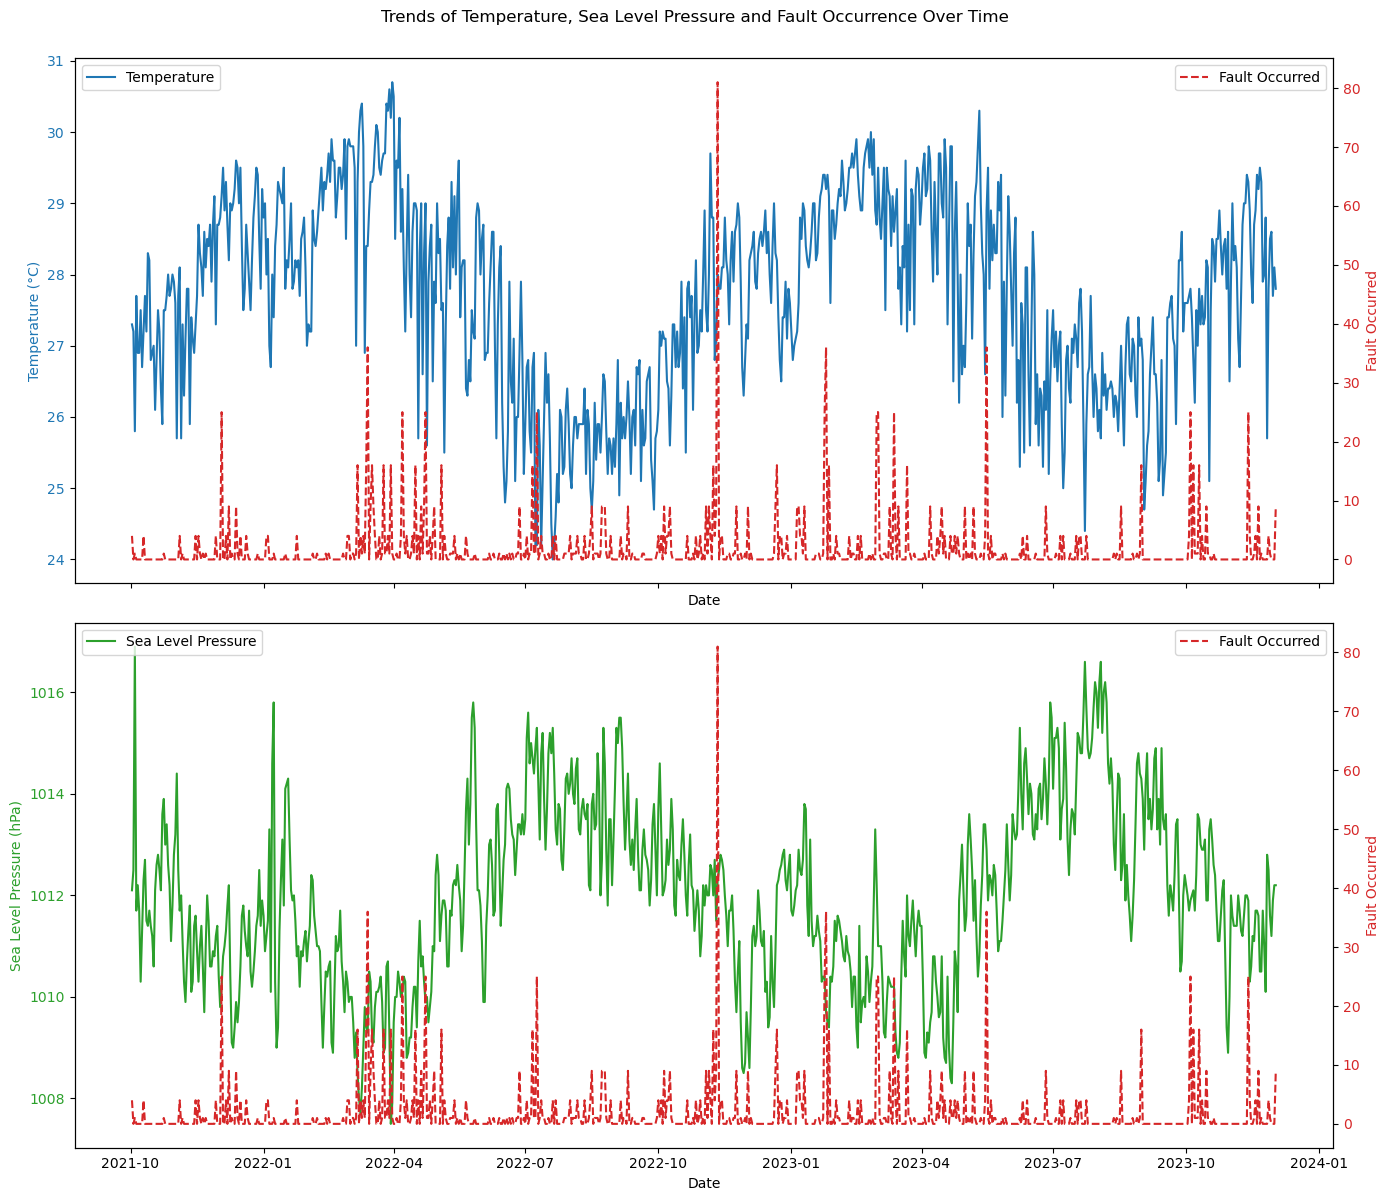

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' column is datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Prepare the data
faults_per_day = merged_df.groupby('Date')['Fault Occurred'].sum().reset_index()
temp_per_day = merged_df.groupby('Date')['temp'].mean().reset_index()
pressure_per_day = merged_df.groupby('Date')['sealevelpressure'].mean().reset_index()
cloudcover_per_day = merged_df.groupby('Date')['cloudcover'].mean().reset_index()

# Merge the dataframes on 'Date'
trend_df_temp = pd.merge(faults_per_day, temp_per_day, on='Date', how='inner')
trend_df_pressure = pd.merge(faults_per_day, pressure_per_day, on='Date', how='inner')
trend_df_cloudcover = pd.merge(faults_per_day, cloudcover_per_day, on='Date', how='inner')

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 13), sharex=True)

# Plot temperature on the first subplot
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
sns.lineplot(data=trend_df_temp, x='Date', y='temp', ax=ax1, color='tab:blue', label='Temperature', linestyle='-')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax12 = ax1.twinx()
ax12.set_ylabel('Fault Occurred', color='tab:red')
sns.lineplot(data=trend_df_temp, x='Date', y='Fault Occurred', ax=ax12, color='tab:red', label='Fault Occurred', linestyle='--')
ax12.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(loc='upper left')
ax12.legend(loc='upper right')

# Plot sea level pressure on the second subplot
ax2.set_xlabel('Date')
ax2.set_ylabel('Sea Level Pressure (hPa)', color='tab:green')
sns.lineplot(data=trend_df_pressure, x='Date', y='sealevelpressure', ax=ax2, color='tab:green', label='Sea Level Pressure', linestyle='-')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax22 = ax2.twinx()
ax22.set_ylabel('Fault Occurred', color='tab:red')
sns.lineplot(data=trend_df_pressure, x='Date', y='Fault Occurred', ax=ax22, color='tab:red', label='Fault Occurred', linestyle='--')
ax22.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper left')
ax22.legend(loc='upper right')



# Add title and show plot
plt.suptitle('Trends of Temperature, Sea Level Pressure and Fault Occurrence Over Time', y=0.92)
fig.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust layout to fit everything nicely
plt.show()


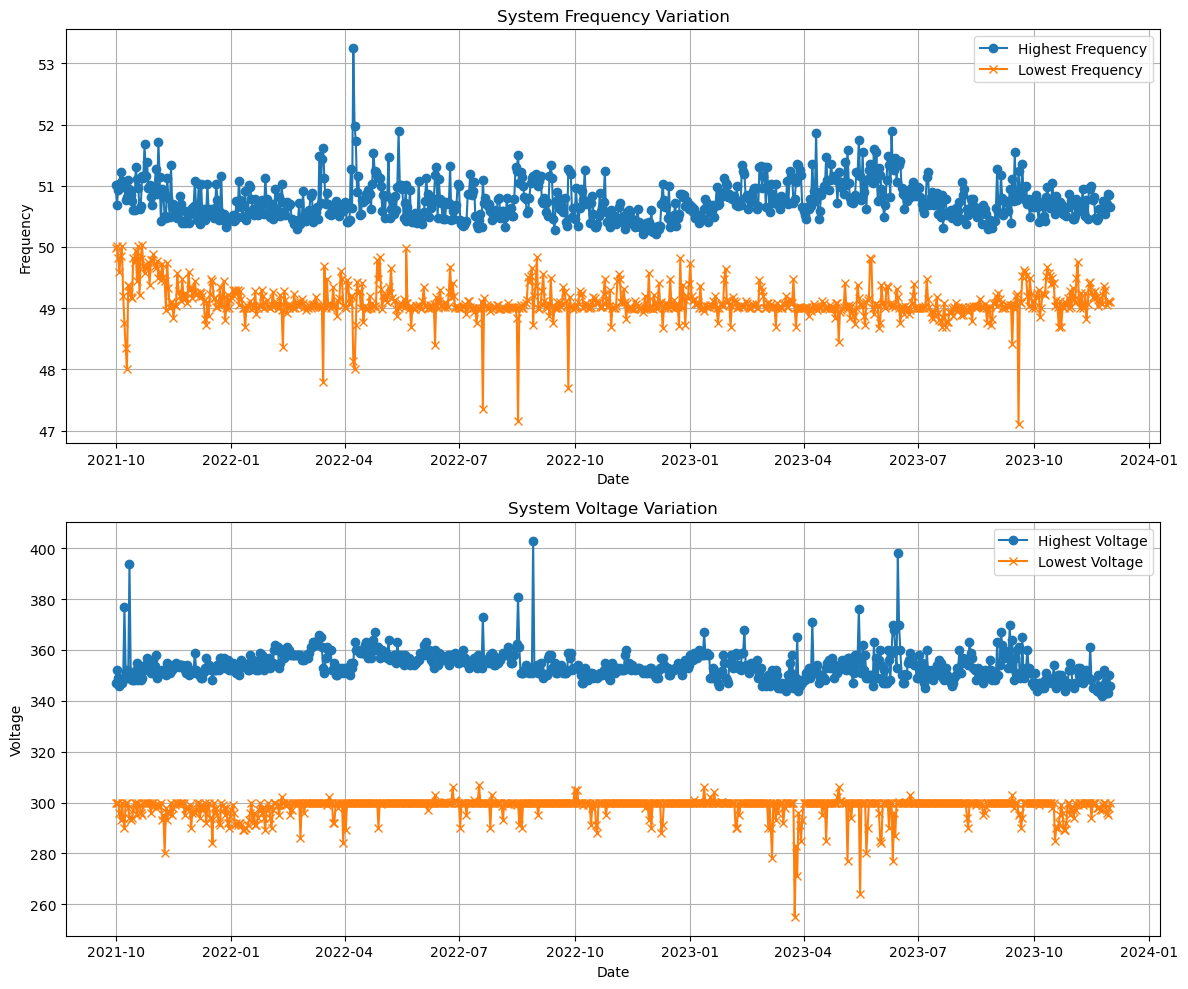

Number of occurrences where system frequency exceeded 50: 793
Number of occurrences where system voltage exceeded 350: 592


In [49]:
# Convert the 'Date' column to datetime if it's not already in datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Variation of system frequency and voltage over the period
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot system frequency
axes[0].plot(neso_data['Date'], neso_data['Highest System Frequency'], label='Highest Frequency', marker='o')
axes[0].plot(neso_data['Date'], neso_data['Lowest System Frequency'], label='Lowest Frequency', marker='x')
axes[0].set_title('System Frequency Variation')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Plot system voltage
axes[1].plot(neso_data['Date'], neso_data['Highest Voltage Recorded'], label='Highest Voltage', marker='o')
axes[1].plot(neso_data['Date'], neso_data['Lowest Voltage Recorded'], label='Lowest Voltage', marker='x')
axes[1].set_title('System Voltage Variation')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Voltage')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Frequency of occurrences where system frequency or voltage exceeded certain thresholds
frequency_threshold = 50  # Example threshold for system frequency
voltage_threshold = 350  # Example threshold for system voltage

frequency_exceedances = neso_data[neso_data['Highest System Frequency'] > frequency_threshold]
voltage_exceedances = neso_data[neso_data['Highest Voltage Recorded'] > voltage_threshold]

print(f'Number of occurrences where system frequency exceeded {frequency_threshold}: {len(frequency_exceedances)}')
print(f'Number of occurrences where system voltage exceeded {voltage_threshold}: {len(voltage_exceedances)}')

In [23]:
df

,Date,Branch,Location,Feeder,Category,Fault,Areas Affected
0,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI
1,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI
2,2021-10-03,NaN,NaN,NaN,NaN,None,NaN
3,2021-10-04,Abule Egba,FAGBA,Not Specified,Transformer,FAULT ON 11-IJAIYE OJOKOROINJ-T1-AGBADO 2-MAJE...,11 IJAIYE OJOKOROINJ T1 AGBADO 2 MAJEOBAJE
4,2021-10-05,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...
1046,2023-11-30,NaN,NaN,NaN,NaN,None,NaN
1047,2023-12-01,NaN,NaN,NaN,NaN,None,NaN
1048,2023-12-02,Oshodi,IGANDO,33 KV,Feeder,OUTAGE ON IGANDO 33KV FEEDER,"11 IGANDOINJ T2 GENERAL HOSPITAL ODUNBAYO, 11 ..."
1049,2023-12-02,Akowonjo,ABULE,Not Specified,Substation,CNN TO ALL CUSTOMERS FEEDING FROM ALIMOSHO 3X1...,11 ALIMOSHOINJ T4 AKOWONJO 11 ALIMOSHOINJ T4 F...


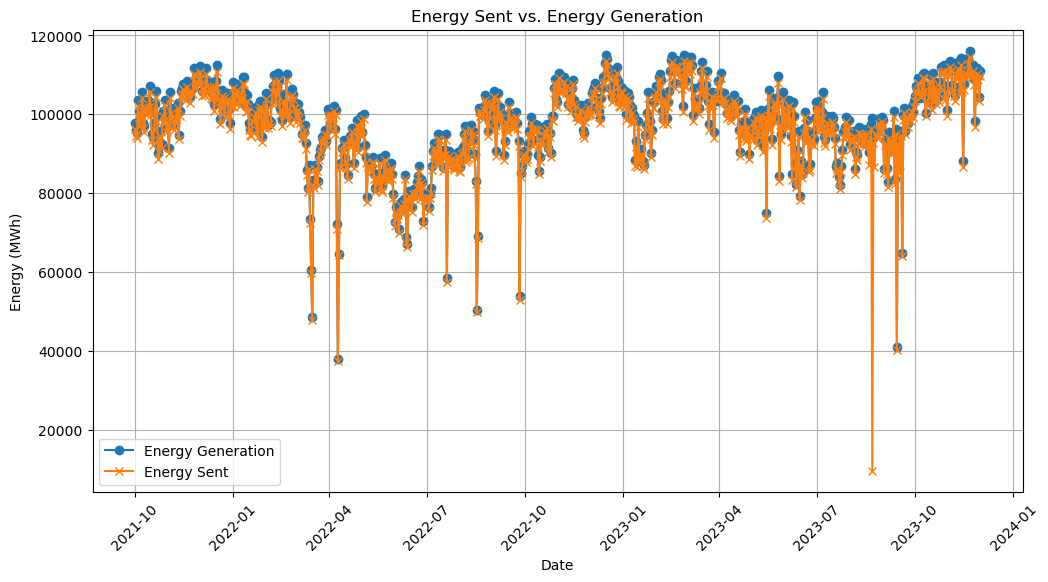

Average efficiency of energy transmission: 98.52%


In [50]:
# Comparison of daily energy sent versus daily energy generation
plt.figure(figsize=(12, 6))
plt.plot(neso_data['Date'], neso_data['Daily Energy Generation'], label='Energy Generation', marker='o')
plt.plot(neso_data['Date'], neso_data['Daily Energy Sent'], label='Energy Sent', marker='x')
plt.title('Energy Sent vs. Energy Generation')
plt.xlabel('Date')
plt.ylabel('Energy (MWh)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Analysis of efficiency or losses in energy transmission
efficiency = (neso_data['Daily Energy Sent'] / neso_data['Daily Energy Generation']) * 100
average_efficiency = efficiency.mean()
print(f'Average efficiency of energy transmission: {average_efficiency:.2f}%')

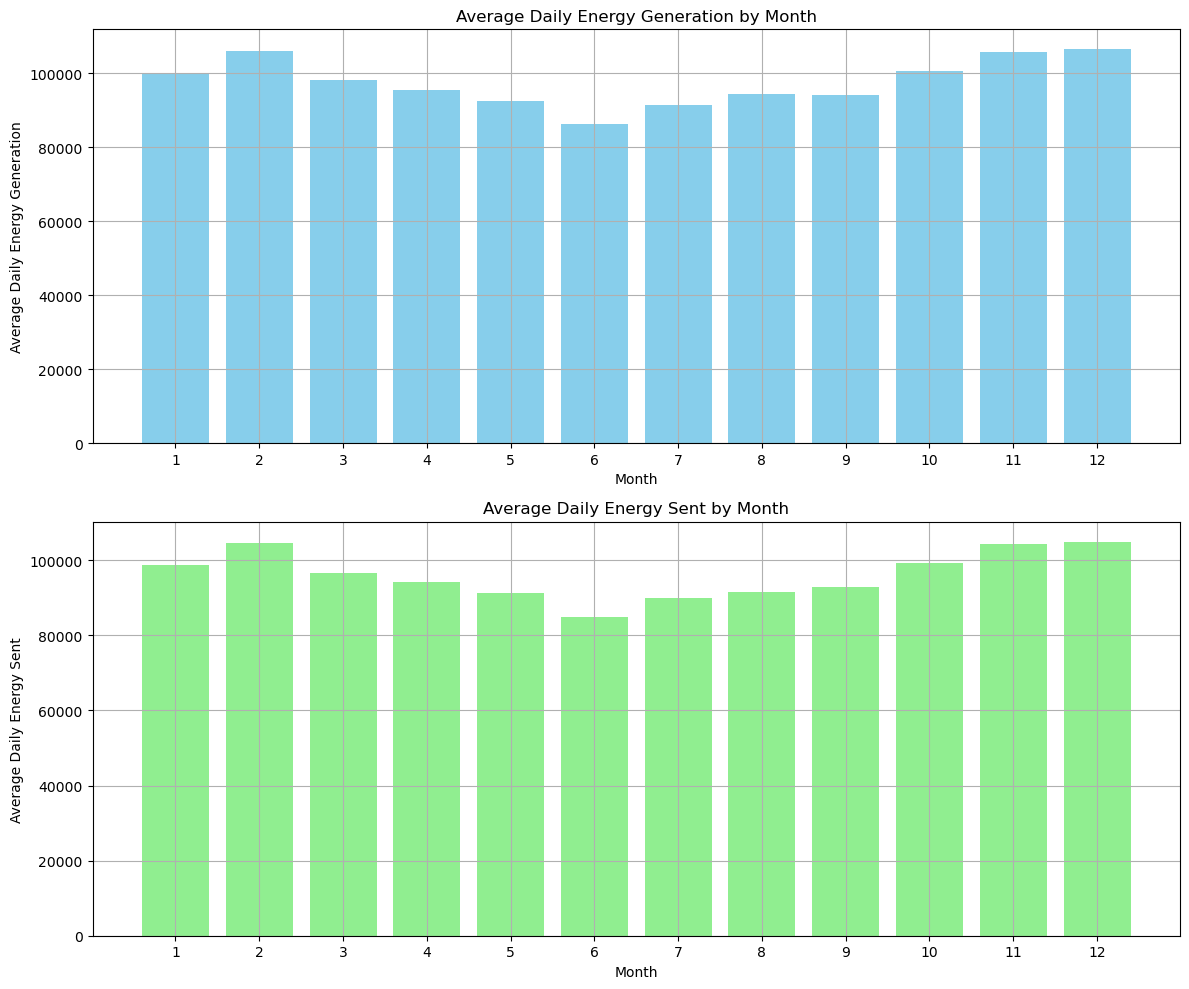

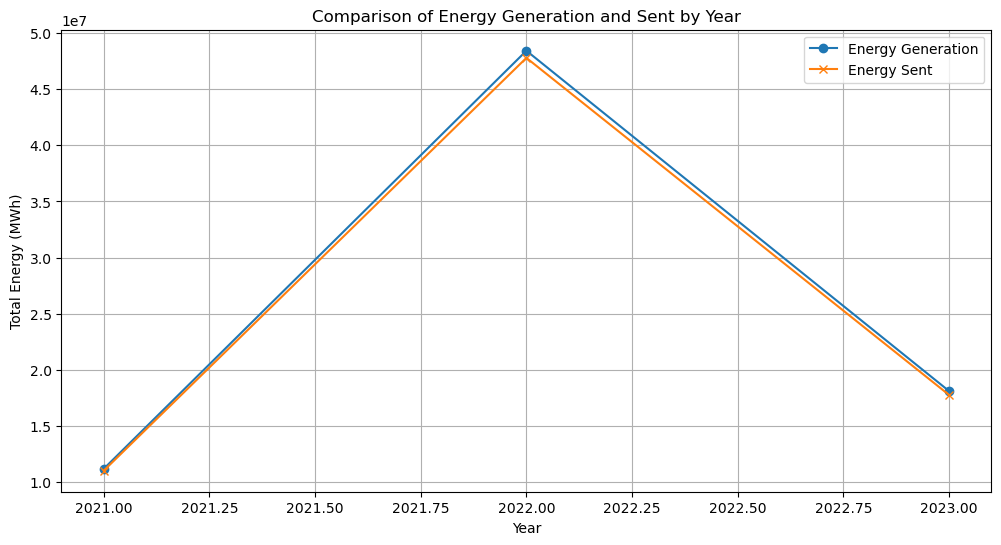

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot seasonal trends in generation
neso_data['Month'] = neso_data['Date'].dt.month
generation_by_month = neso_data.groupby('Month')['Daily Energy Generation'].mean()
axes[0].bar(generation_by_month.index, generation_by_month.values, color='skyblue')
axes[0].set_title('Average Daily Energy Generation by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Daily Energy Generation')
axes[0].set_xticks(range(1, 13))
axes[0].grid(True)

# Plot seasonal trends in transmission
transmission_by_month = neso_data.groupby('Month')['Daily Energy Sent'].mean()
axes[1].bar(transmission_by_month.index, transmission_by_month.values, color='lightgreen')
axes[1].set_title('Average Daily Energy Sent by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average Daily Energy Sent')
axes[1].set_xticks(range(1, 13))
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Comparison of key metrics between different years
fig, ax = plt.subplots(figsize=(12, 6))

# Plot comparison of key metrics between different years
generation_by_year = neso_data.groupby(df['Date'].dt.year)['Daily Energy Generation'].sum()
sent_by_year = neso_data.groupby(df['Date'].dt.year)['Daily Energy Sent'].sum()
ax.plot(generation_by_year.index, generation_by_year.values, label='Energy Generation', marker='o')
ax.plot(sent_by_year.index, sent_by_year.values, label='Energy Sent', marker='x')
ax.set_title('Comparison of Energy Generation and Sent by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Energy (MWh)')
ax.legend()
ax.grid(True)

plt.show()

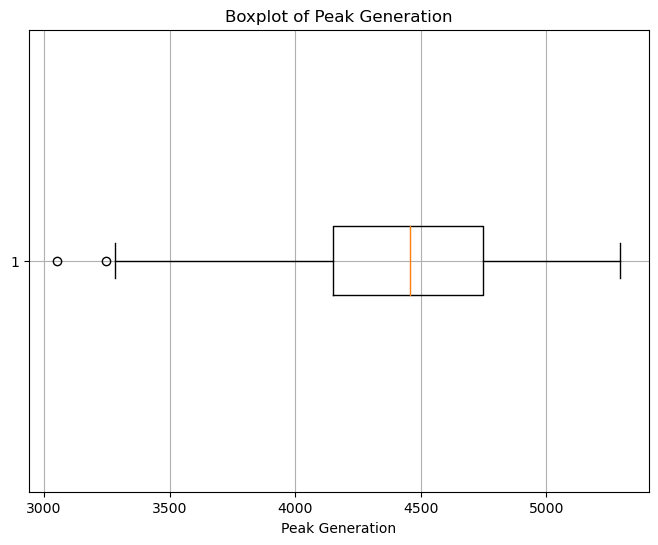

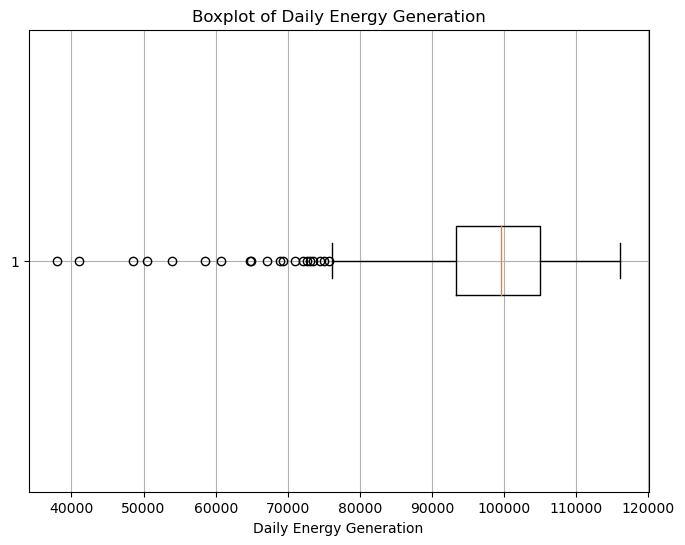

In [53]:
# Boxplot to identify outliers in peak generation
plt.figure(figsize=(8, 6))
plt.boxplot(neso_data['Peak Generation'], vert=False)
plt.title('Boxplot of Peak Generation')
plt.xlabel('Peak Generation')
plt.grid(True)
plt.show()

# Boxplot to identify outliers in daily energy generation
plt.figure(figsize=(8, 6))
plt.boxplot(neso_data['Daily Energy Generation'], vert=False)
plt.title('Boxplot of Daily Energy Generation')
plt.xlabel('Daily Energy Generation')
plt.grid(True)
plt.show()

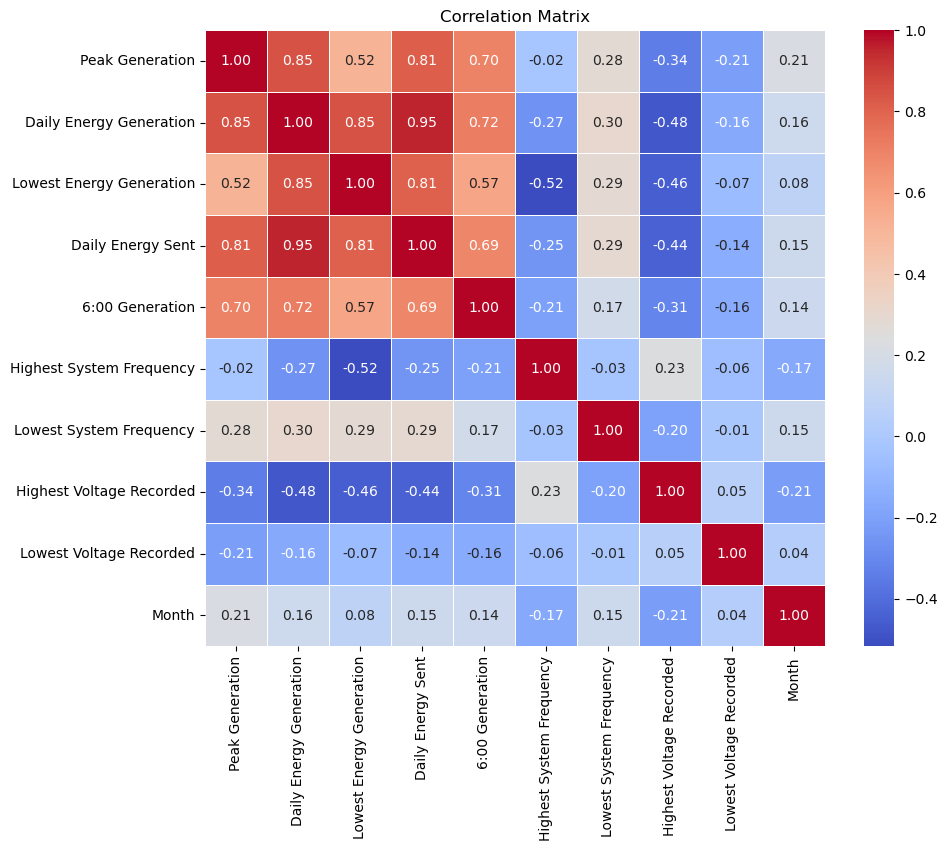

In [54]:
# Drop non-numeric columns if present
numeric_df = neso_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

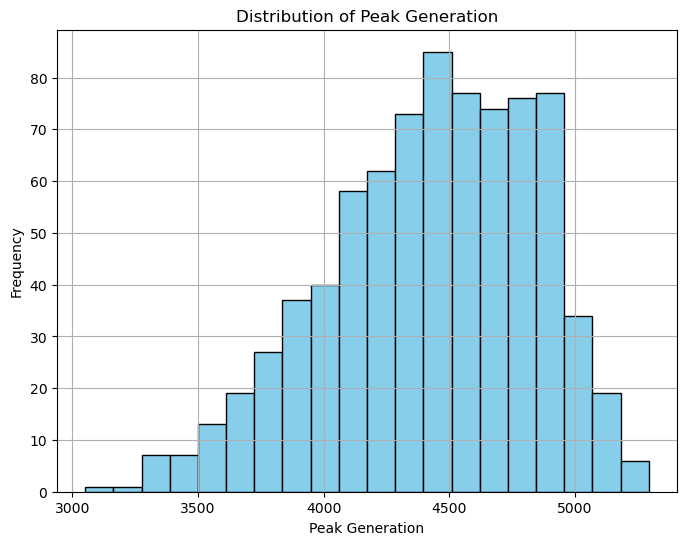

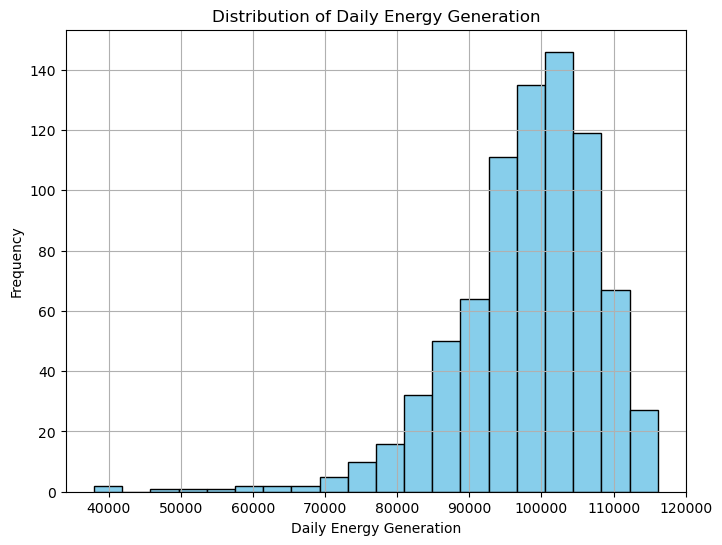

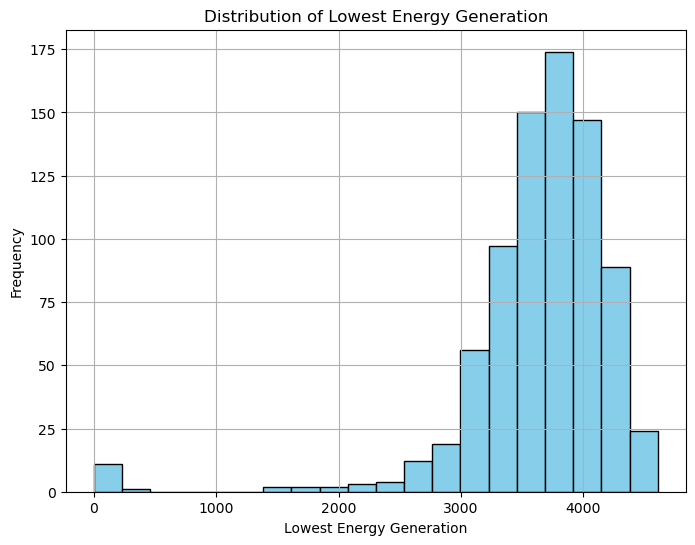

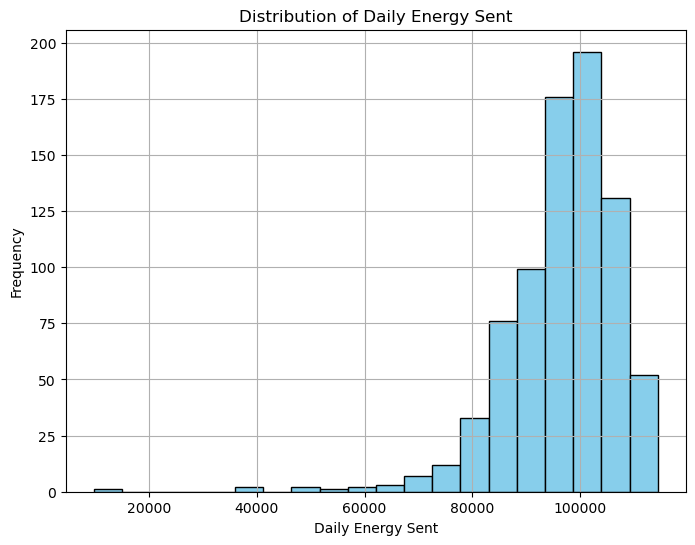

In [55]:
# Select key variables for distribution analysis
key_variables = ['Peak Generation', 'Daily Energy Generation', 'Lowest Energy Generation', 'Daily Energy Sent']

# Plot histograms for each key variable
for var in key_variables:
    plt.figure(figsize=(8, 6))
    plt.hist(neso_data[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [7]:
import os
import pandas as pd
weather_data_dir = 'weather_data/'

# List of branch names (derived from file names)
branch_names = [file.split('_weather.csv')[0] for file in os.listdir(weather_data_dir) if file.endswith('_weather.csv')]

# Merge the data for each branch
for branch_name in branch_names:
    # Read the weather data for the current branch
    branch_weather_data = pd.read_csv(os.path.join(weather_data_dir, f'{branch_name}_weather.csv'), parse_dates=['datetime'])

In [8]:
branch_weather_data = pd.read_csv(os.path.join(weather_data_dir, f'ikeja_weather.csv'), parse_dates=['datetime'])

In [9]:
branch_weather_data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"6.605874, 3.349149",2021-10-01,29.6,25.0,26.6,35.5,25.0,28.4,24.7,90.0,...,9.0,4,NaN,2021-10-01T06:34:24,2021-10-01T18:37:59,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"DNMM,remote,65201099999,VRJT5"
1,"6.605874, 3.349149",2021-10-02,31.0,24.0,27.3,39.1,24.0,30.5,24.7,86.4,...,11.2,5,NaN,2021-10-02T06:34:15,2021-10-02T18:37:29,0.87,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999,VRJT5"
2,"6.605874, 3.349149",2021-10-03,31.1,24.8,27.2,37.9,24.8,30.0,24.9,87.8,...,11.2,4,NaN,2021-10-03T06:34:07,2021-10-03T18:36:59,0.90,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"DNMM,remote,65201099999,VRJT5"
3,"6.605874, 3.349149",2021-10-04,32.1,13.5,25.8,39.3,13.5,29.2,22.2,81.1,...,19.1,8,NaN,2021-10-04T06:33:59,2021-10-04T18:36:30,0.94,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5,65201099999"
4,"6.605874, 3.349149",2021-10-05,31.0,24.9,27.7,37.7,24.9,31.1,24.7,84.3,...,15.1,6,NaN,2021-10-05T06:33:51,2021-10-05T18:36:01,0.97,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999,VRJT5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,"6.605874, 3.349149",2023-11-30,32.0,25.0,27.7,40.6,25.0,31.4,25.0,85.4,...,22.2,9,60.0,2023-11-30T06:42:06,2023-11-30T18:28:16,0.60,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"VRJU8,DNMM,65201099999"
791,"6.605874, 3.349149",2023-12-01,33.0,24.0,28.1,42.2,24.0,32.1,25.3,86.3,...,20.5,9,60.0,2023-12-01T06:42:33,2023-12-01T18:28:33,0.63,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VRJU8,DNMM,65201099999"
792,"6.605874, 3.349149",2023-12-02,33.1,23.0,27.8,40.9,23.0,31.3,24.1,82.0,...,18.9,8,60.0,2023-12-02T06:43:01,2023-12-02T18:28:51,0.66,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"VRJU8,DNMM,remote,65201099999"
793,"6.605874, 3.349149",2023-12-03,34.0,25.0,29.0,43.5,25.0,34.1,25.1,80.5,...,22.3,9,30.0,2023-12-03T06:43:29,2023-12-03T18:29:10,0.69,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VRJU8,DNMM,65201099999"


Structure, Granularity, Scope, Temporality, and Faithfulness (SGSTF) analysis on the provided weather data for Ikeja, let's break down each aspect:

Structure:

The data appears to be structured with columns representing different attributes of weather observations.
Columns include information such as name, datetime, tempmax, tempmin, feelslike, humidity, precip, windgust, sealevelpressure, solarradiation, sunrise, sunset, and more.
Each row corresponds to a specific date (datetime) and weather observations for that date.

Granularity:

The granularity of the data is at the daily level, where each row represents weather observations for a specific day.
There is detailed information for each day, including maximum and minimum temperatures, humidity, precipitation, wind-related data, and more.

Scope:

The scope of the data covers a range of weather-related attributes, providing comprehensive information for each day.
Relevant weather parameters such as temperature, humidity, precipitation, wind, and atmospheric pressure are included.

Temporality:

The data includes temporal information with the datetime column representing the date of the weather observations.
Temporal aspects also include sunrise and sunset times, providing information about daylight duration.
The data covers a specific time period, and each row represents weather conditions for a particular day.

Faithfulness:

The faithfulness of the data depends on the accuracy and reliability of the weather observations.
The data includes information about the source stations (stations column), providing an indication of where the data is collected.
The presence of descriptive columns like conditions, description, and icon enhances the interpretability of the data.

In summary, the weather data for Ikeja has a well-structured format with daily granularity, covering a comprehensive scope of weather-related attributes. Temporal aspects are adequately represented, and the faithfulness is supported by the inclusion of relevant descriptive columns and source information.

In [36]:
relevant_columns = [
    'datetime', 'temp', 'humidity',
    'precip', 'precipprob', 'precipcover', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
    'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
    'conditions', 'description', 'icon'
]

# Creating a new DataFrame with only the relevant columns
relevant_data = branch_weather_data[relevant_columns]

In [15]:
# Display column names and data types
print(relevant_data.info())

# Display the first few rows of the dataset
print(relevant_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          795 non-null    datetime64[ns]
 1   tempmax           795 non-null    float64       
 2   tempmin           795 non-null    float64       
 3   feelslikemax      795 non-null    float64       
 4   feelslikemin      795 non-null    float64       
 5   humidity          795 non-null    float64       
 6   precip            795 non-null    float64       
 7   precipprob        795 non-null    int64         
 8   windgust          785 non-null    float64       
 9   windspeed         795 non-null    float64       
 10  winddir           795 non-null    float64       
 11  sealevelpressure  794 non-null    float64       
 12  cloudcover        795 non-null    float64       
 13  visibility        794 non-null    float64       
 14  solarradiation    795 non-

In [16]:
# Display statistical summary
print(relevant_data.describe())

                            datetime     tempmax     tempmin  feelslikemax  \
count                            795  795.000000  795.000000    795.000000   
mean   2022-11-01 23:59:59.999999744   32.051698   24.073459     38.330314   
min              2021-10-01 00:00:00   25.000000   10.000000     25.000000   
25%              2022-04-17 12:00:00   30.050000   23.200000     35.100000   
50%              2022-11-02 00:00:00   32.000000   24.700000     39.200000   
75%              2023-05-19 12:00:00   34.000000   25.000000     41.800000   
max              2023-12-04 00:00:00   54.000000   28.000000     54.000000   
std                              NaN    2.458857    2.282788      4.013353   

       feelslikemin    humidity      precip  precipprob    windgust  \
count    795.000000  795.000000  795.000000  795.000000  785.000000   
mean      24.294843   80.930063    5.175849   49.308176   25.740255   
min        6.800000   47.400000    0.000000    0.000000    9.400000   
25%       23.

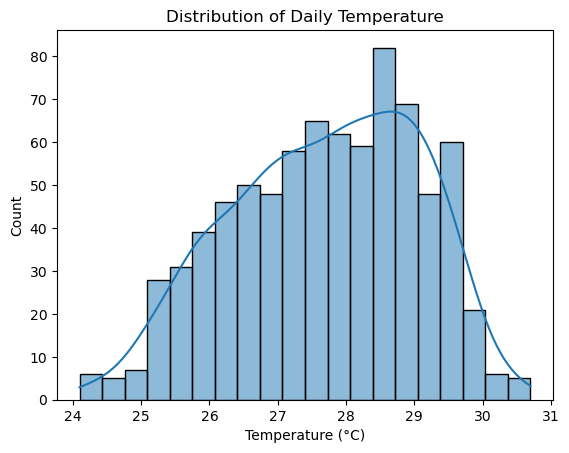

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Temperature
sns.histplot(relevant_data['temp'], bins=20, kde=True)
plt.title('Distribution of Daily Temperature')
plt.xlabel('Temperature (°C)')
plt.show()

In [39]:
relevant_data.drop(columns=['datetime','conditions', 'description', 'icon'])

,temp,humidity,precip,precipprob,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,26.6,90.0,3.0,100,8.33,16.6,14.8,237.5,1013.3,55.5,9.6,103.3,9.0,4
1,27.3,86.4,0.0,0,0.00,27.7,24.1,241.4,1012.1,55.1,9.6,126.4,11.2,5
2,27.2,87.8,1.0,100,33.33,16.6,18.7,244.4,1012.5,61.0,9.8,129.6,11.2,4
3,25.8,81.1,3.0,100,66.67,27.7,55.4,196.6,1016.9,55.5,13.3,222.4,19.1,8
4,27.7,84.3,0.0,0,0.00,16.6,18.4,209.0,1011.7,56.9,9.6,177.3,15.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,27.7,85.4,2.0,100,4.17,22.3,18.4,227.4,1011.9,45.7,8.6,258.3,22.2,9
791,28.1,86.3,0.0,0,0.00,20.5,20.5,239.4,1012.2,51.8,8.8,239.3,20.5,9
792,27.8,82.0,5.0,100,4.17,19.4,14.8,210.3,1012.2,49.8,9.5,218.6,18.9,8
793,29.0,80.5,0.0,0,0.00,24.1,25.9,218.6,1011.6,45.7,8.3,259.6,22.3,9


/var/folders/dp/fn2v5z3x7pj63xx0j5wvqjvm0000gp/T/ipykernel_68458/2909655152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datetime'] = pd.to_datetime(relevant_data['datetime'])


    datetime  temp  humidity  precip  precipprob  precipcover  windgust  \
0 2021-10-01  26.6      90.0     3.0         100         8.33      16.6   
1 2021-10-02  27.3      86.4     0.0           0         0.00      27.7   
2 2021-10-03  27.2      87.8     1.0         100        33.33      16.6   
3 2021-10-04  25.8      81.1     3.0         100        66.67      27.7   
4 2021-10-05  27.7      84.3     0.0           0         0.00      16.6   

   windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0       14.8    237.5            1013.3        55.5         9.6   
1       24.1    241.4            1012.1        55.1         9.6   
2       18.7    244.4            1012.5        61.0         9.8   
3       55.4    196.6            1016.9        55.5        13.3   
4       18.4    209.0            1011.7        56.9         9.6   

   solarradiation  solarenergy  uvindex              conditions  \
0           103.3          9.0        4  Rain, Partially cloudy   
1           

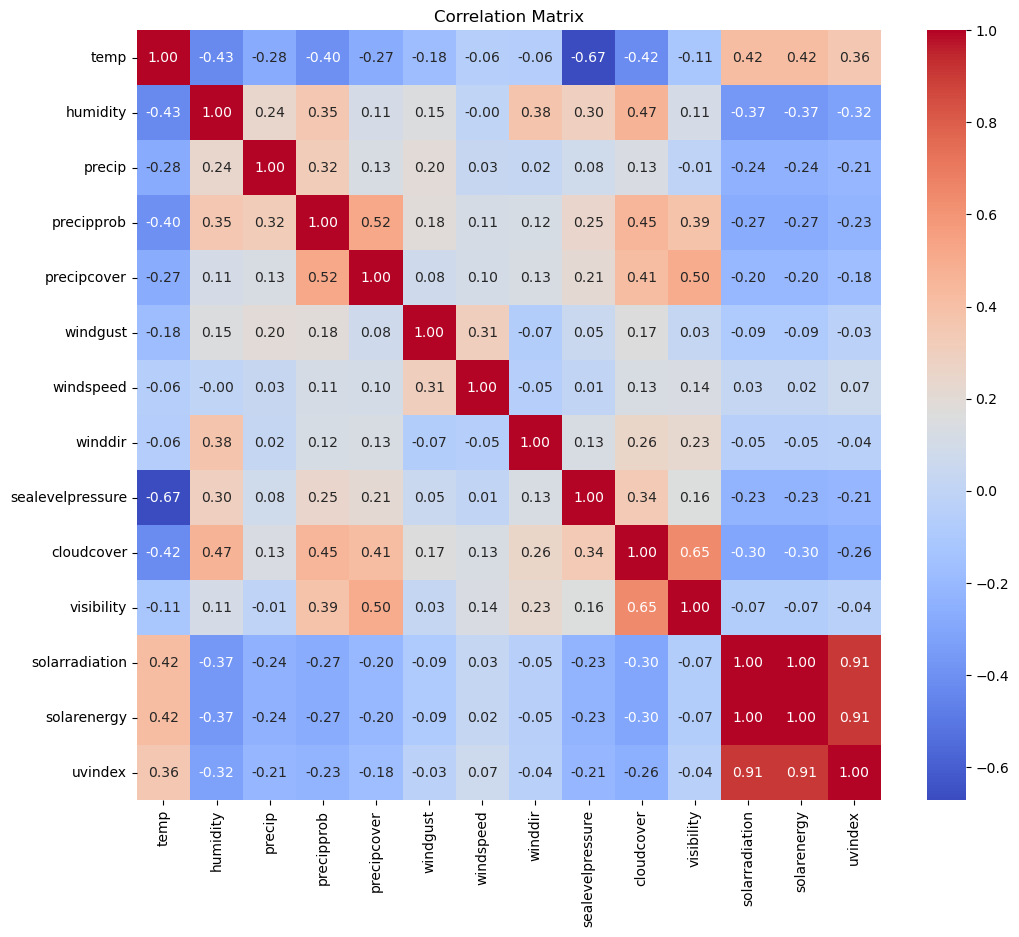

In [41]:
# Convert 'datetime' column to datetime format
relevant_data['datetime'] = pd.to_datetime(relevant_data['datetime'])

# Drop the 'datetime' column before computing the correlation matrix
correlation_matrix = relevant_data.drop(columns=['datetime','conditions', 'description', 'icon']).corr()

# Displaying the first few rows of the relevant data
print(relevant_data.head())
plt.figure(figsize=(12, 10))
# Example: Correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [37]:
import pandas as pd
complete_data = pd.read_csv('complete_data.csv')

In [48]:
outages_df.head(3)

,Date,Branch,Location,Feeder,Category,Fault,Areas Affected,Peak Generation,Daily Energy Generation,Lowest Energy Generation,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI,4574.23,96086.18,3321.9,...,11.2,5,NaN,2021-10-02T06:34:10,2021-10-02T18:37:26,0.87,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999,VRJT5"
1,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI,4574.23,96086.18,3321.9,...,11.2,5,NaN,2021-10-02T06:34:10,2021-10-02T18:37:26,0.87,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999,VRJT5"
3,2021-10-04,Abule Egba,FAGBA,Not Specified,Transformer (N/S),FAULT ON 11-IJAIYE OJOKOROINJ-T1-AGBADO 2-MAJE...,11 IJAIYE OJOKOROINJ T1 AGBADO 2 MAJEOBAJE,4932.41,103650.50,3473.8,...,19.1,8,NaN,2021-10-04T06:33:53,2021-10-04T18:36:27,0.94,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5,65201099999"


In [61]:
complete_data['Date'] = pd.to_datetime(complete_data['Date'])
faults_df = complete_data[complete_data['Fault'].notna()]


# Create a binary column indicating whether a fault occurred or not on each day
faults_df['Fault Occurred'] = 1

# Group by date and sum the occurrences of faults
daily_faults = faults_df.groupby('Date')['Fault Occurred'].sum().reset_index()

# Merge daily fault occurrences with the main dataframe
merged_df = pd.merge(complete_data, daily_faults, on='Date', how='left')

# Fill NaN values in 'Fault Occurred' with 0
merged_df['Fault Occurred'] = merged_df['Fault Occurred'].fillna(0)

# Select weather columns to correlate with outages
weather_columns = ['Daily Energy Sent', 'temp', 'humidity', 'precip', 'precipprob', 'precipcover', 
                   'windgust', 'windspeed', 'winddir', 'sealevelpressure', 
                   'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 
                   'uvindex']

# Calculate correlation between each weather column and Fault Occurred
correlations = {}
for column in weather_columns:
    if column in merged_df.columns:
        correlation = merged_df[column].corr(merged_df['Fault Occurred'])
        correlations[column] = correlation

# Print correlations
for column, correlation in correlations.items():
    print(f"Correlation between '{column}' and Fault Occurred: {correlation:.2f}")

Correlation between 'Daily Energy Sent' and Fault Occurred: 0.03
Correlation between 'temp' and Fault Occurred: 0.16
Correlation between 'humidity' and Fault Occurred: -0.03
Correlation between 'precip' and Fault Occurred: -0.02
Correlation between 'precipprob' and Fault Occurred: -0.03
Correlation between 'precipcover' and Fault Occurred: -0.06
Correlation between 'windgust' and Fault Occurred: -0.04
Correlation between 'windspeed' and Fault Occurred: -0.07
Correlation between 'winddir' and Fault Occurred: 0.02
Correlation between 'sealevelpressure' and Fault Occurred: -0.15
Correlation between 'cloudcover' and Fault Occurred: -0.11
Correlation between 'visibility' and Fault Occurred: -0.04
Correlation between 'solarradiation' and Fault Occurred: 0.05
Correlation between 'solarenergy' and Fault Occurred: 0.05
Correlation between 'uvindex' and Fault Occurred: 0.06


/var/folders/dp/fn2v5z3x7pj63xx0j5wvqjvm0000gp/T/ipykernel_3796/3841431073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faults_df['Fault Occurred'] = 1


In [64]:
import numpy as np
# Extract specific correlations
temp_corr = correlations.get('temp', 0)
sealevelpressure_corr = correlations.get('sealevelpressure', 0)
cloudcover_corr = correlations.get('cloudcover', 0)
# Example weights for each variable
weights = {
    'temp': 0.5,
    'sealevelpressure': 0.3,
    'cloudcover': 0.2
}

# Calculate weighted average correlation
combined_weighted_correlation = np.average(
    [temp_corr, sealevelpressure_corr, cloudcover_corr],
    weights=[weights['temp'], weights['sealevelpressure'], weights['cloudcover']]
)
print(f'Weighted combined correlation of temp, sealevelpressure, and cloudcover with Fault Occurred: {combined_weighted_correlation:.2f}')


Weighted combined correlation of temp, sealevelpressure, and cloudcover with Fault Occurred: 0.01


In [58]:
merged_df['']

KeyError: ''

In [51]:
merged_df[column].corr(merged_df['Fault Occurred'])

KeyError: 'temp'

In [47]:
merged_df

,Date,Branch,Location,Feeder,Category,Fault,Areas Affected,Fault Occurred
0,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI,2.0
1,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI,2.0
2,2021-10-03,NaN,NaN,NaN,NaN,None,NaN,0.0
3,2021-10-04,Abule Egba,FAGBA,Not Specified,Transformer,FAULT ON 11-IJAIYE OJOKOROINJ-T1-AGBADO 2-MAJE...,11 IJAIYE OJOKOROINJ T1 AGBADO 2 MAJEOBAJE,1.0
4,2021-10-05,NaN,NaN,NaN,NaN,None,NaN,0.0
...,...,...,...,...,...,...,...,...
1046,2023-11-30,NaN,NaN,NaN,NaN,None,NaN,0.0
1047,2023-12-01,NaN,NaN,NaN,NaN,None,NaN,0.0
1048,2023-12-02,Oshodi,IGANDO,33 KV,Feeder,OUTAGE ON IGANDO 33KV FEEDER,"11 IGANDOINJ T2 GENERAL HOSPITAL ODUNBAYO, 11 ...",3.0
1049,2023-12-02,Akowonjo,ABULE,Not Specified,Substation,CNN TO ALL CUSTOMERS FEEDING FROM ALIMOSHO 3X1...,11 ALIMOSHOINJ T4 AKOWONJO 11 ALIMOSHOINJ T4 F...,3.0


/var/folders/dp/fn2v5z3x7pj63xx0j5wvqjvm0000gp/T/ipykernel_68458/885127463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['datetime'] = pd.to_datetime(relevant_data['datetime'])


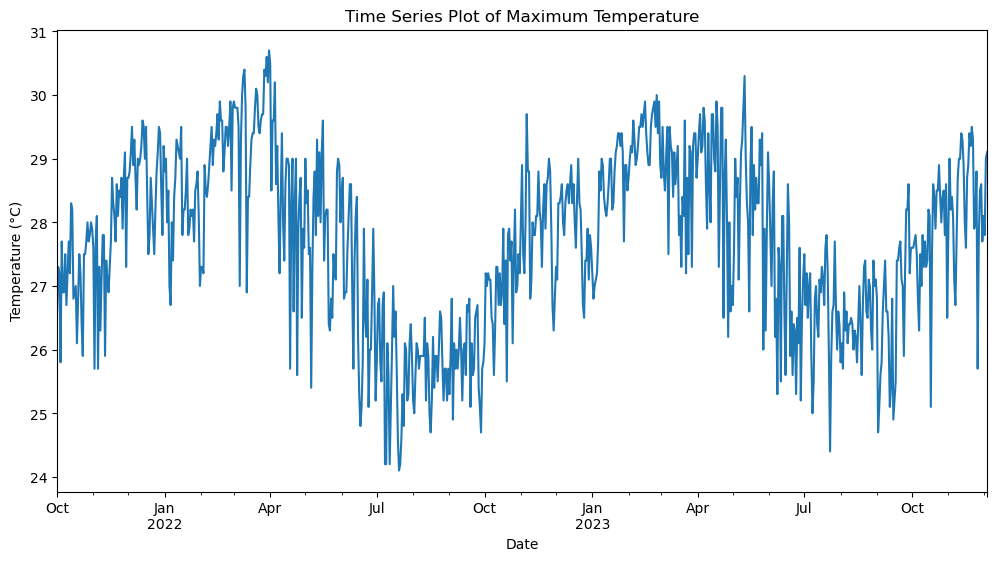

In [42]:
# Convert 'datetime' column to datetime format
relevant_data['datetime'] = pd.to_datetime(relevant_data['datetime'])

# Set 'datetime' column as the index
relevant_data.set_index('datetime', inplace=True)

# Example: Time series plot of temperature
plt.figure(figsize=(12, 6))
relevant_data['temp'].plot()
plt.title('Time Series Plot of Maximum Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


In [25]:
import os
data = pd.read_csv(os.path.join('complete_data.csv'), parse_dates=['datetime'])

In [26]:
data

,Date,Branch,Location,Feeder,Category,Fault,Areas Affected,Peak Generation,Daily Energy Generation,Lowest Energy Generation,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI,4574.23,96086.18,3321.90,...,11.2,5,NaN,2021-10-02T06:34:10,2021-10-02T18:37:26,0.87,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999,VRJT5"
1,2021-10-02,Shomolu,OWORO,33 KV,Feeder,FAULT ON OWORO IGBOBI 33KV,OWORO IGBOBI,4574.23,96086.18,3321.90,...,11.2,5,NaN,2021-10-02T06:34:10,2021-10-02T18:37:26,0.87,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999,VRJT5"
2,2021-10-03,NaN,NaN,NaN,NaN,NaN,NaN,4849.03,95387.46,3284.00,...,11.2,4,NaN,2021-10-03T06:34:01,2021-10-03T18:36:56,0.90,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"DNMM,remote,65201099999,VRJT5"
3,2021-10-04,Abule Egba,FAGBA,Not Specified,Transformer (N/S),FAULT ON 11-IJAIYE OJOKOROINJ-T1-AGBADO 2-MAJE...,11 IJAIYE OJOKOROINJ T1 AGBADO 2 MAJEOBAJE,4932.41,103650.50,3473.80,...,19.1,8,NaN,2021-10-04T06:33:53,2021-10-04T18:36:27,0.94,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote,VRJT5,65201099999"
4,2021-10-05,NaN,NaN,NaN,NaN,NaN,NaN,4609.41,100927.08,3460.90,...,15.1,6,NaN,2021-10-05T06:33:45,2021-10-05T18:35:58,0.97,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999,VRJT5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,2023-11-30,NaN,NaN,NaN,NaN,NaN,NaN,4979.79,104417.94,3404.91,...,22.2,9,60.0,2023-11-30T06:41:55,2023-11-30T18:28:18,0.60,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"VRJU8,DNMM,65201099999"
1048,2023-12-01,NaN,NaN,NaN,NaN,NaN,NaN,5052.46,111063.89,4235.31,...,20.5,9,60.0,2023-12-01T06:42:22,2023-12-01T18:28:36,0.63,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VRJU8,DNMM,65201099999"
1049,2023-12-02,Oshodi,IGANDO,33 KV,Feeder,OUTAGE ON IGANDO 33KV FEEDER,"11 IGANDOINJ T2 GENERAL HOSPITAL ODUNBAYO, 11 ...",NaN,NaN,NaN,...,18.9,8,60.0,2023-12-02T06:42:49,2023-12-02T18:28:54,0.66,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"VRJU8,DNMM,remote,65201099999"
1050,2023-12-02,Akowonjo,ABULE,Not Specified,Substation,CNN TO ALL CUSTOMERS FEEDING FROM ALIMOSHO 3X1...,11 ALIMOSHOINJ T4 AKOWONJO 11 ALIMOSHOINJ T4 F...,NaN,NaN,NaN,...,18.9,8,60.0,2023-12-02T06:42:49,2023-12-02T18:28:54,0.66,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"VRJU8,DNMM,remote,65201099999"


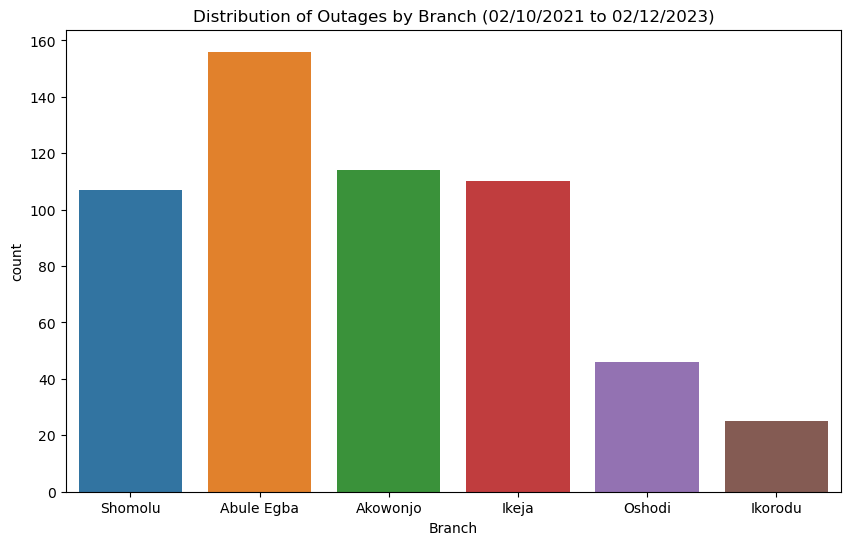

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', data=data)
plt.title('Distribution of Outages by Branch (02/10/2021 to 02/12/2023)')
plt.show()

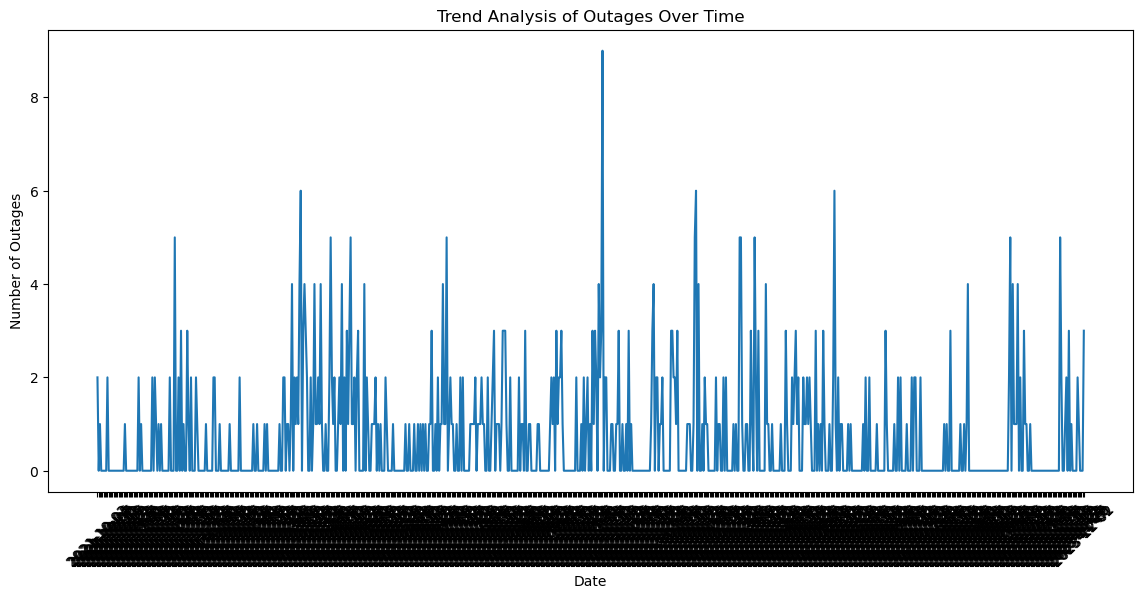

In [48]:
# Extract relevant columns for trend analysis
outages_data = data[['Date', 'Fault']]

# Count the number of outages per day
outages_per_day = outages_data.groupby('Date')['Fault'].count().reset_index()

# Plotting the trend of outages over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Fault', data=outages_per_day)
plt.title('Trend Analysis of Outages Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Outages')
plt.xticks(rotation=45)
plt.show()

In [46]:
print(data.describe())

       Peak Generation  Daily Energy Generation  Lowest Energy Generation  \
count      1049.000000              1049.000000               1049.000000   
mean       4428.935659             98052.316188               3636.479611   
min        3051.500000             37964.930000                  1.000000   
25%        4163.300000             93404.110000               3444.600000   
50%        4464.000000             99612.510000               3749.114689   
75%        4734.400000            105265.010000               4012.900000   
max        5294.100000            116117.870000               4607.700000   
std         406.972764             10169.422662                667.347285   

       Daily Energy Sent  6:00 Generation  Highest System Frequency  \
count        1049.000000      1049.000000               1049.000000   
mean        96649.072904      4166.148922                 50.764779   
min          9778.630000       461.800000                 50.210000   
25%         92155.6572